These code are used for creating figures. I used ChatGPT to generate the code and tweaked as necessary.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


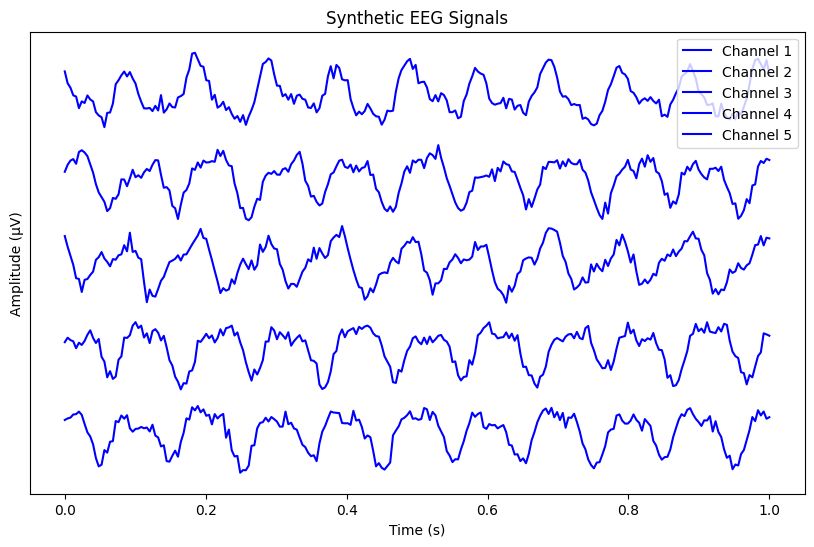

In [ ]:

# Parameters
fs = 250  # Sampling frequency (Hz)
duration = 1  # Duration of the signal (seconds)
time = np.linspace(0, duration, fs * duration)  # Time vector
num_channels = 5  # Number of EEG channels

# Generate random EEG-like signals
eeg_signals = []
for i in range(num_channels):
    # Create a mixture of sine waves with random frequencies (alpha, beta, theta bands)
    alpha_wave = np.sin(2 * np.pi * 10 * time + np.random.rand() * 2 * np.pi) * 1  # Alpha (8-12 Hz)
    beta_wave = np.sin(2 * np.pi * 20 * time + np.random.rand() * 2 * np.pi) * 0.5  # Beta (13-30 Hz)
    theta_wave = np.sin(2 * np.pi * 6 * time + np.random.rand() * 2 * np.pi) * 0.3  # Theta (4-7 Hz)

    noise = np.random.randn(len(time)) * 0.2  # White noise
    eeg_signal = alpha_wave + beta_wave + theta_wave + noise  # Combine components
    eeg_signals.append(eeg_signal)

# Plot EEG signals
plt.figure(figsize=(10, 6), facecolor='none')
for i in range(num_channels):
    plt.plot(time, eeg_signals[i] + i * 4, label=f'Channel {i+1}', color='blue')  # Offset each signal for clarity

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Synthetic EEG Signals')
plt.yticks([])
plt.legend()
plt.savefig("eeg_signals.png", transparent=True, dpi=300)
plt.show()


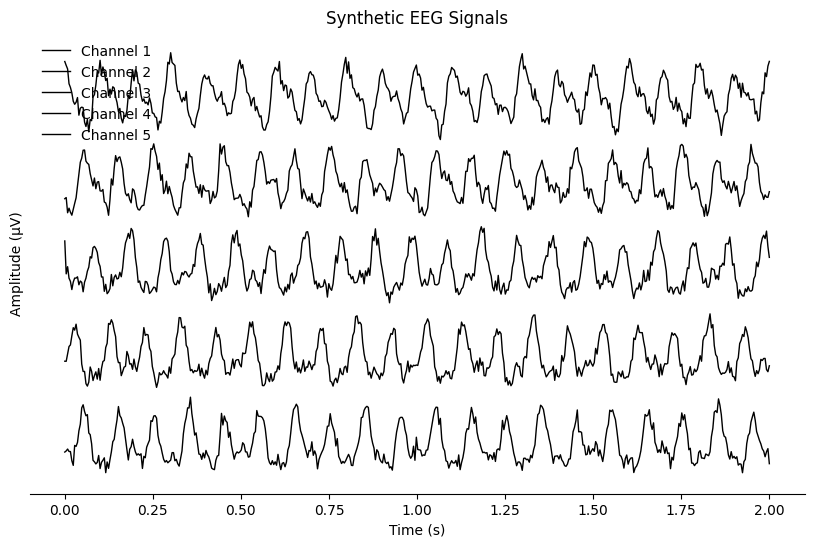

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 250  # Sampling frequency (Hz)
duration = 2  # Duration of the signal (seconds)
time = np.linspace(0, duration, fs * duration)  # Time vector
num_channels = 5  # Number of EEG channels

# Generate random EEG-like signals
eeg_signals = []
for i in range(num_channels):
    alpha_wave = np.sin(2 * np.pi * 10 * time + np.random.rand() * 2 * np.pi)
    beta_wave = np.sin(2 * np.pi * 20 * time + np.random.rand() * 2 * np.pi) * 0.5
    theta_wave = np.sin(2 * np.pi * 6 * time + np.random.rand() * 2 * np.pi) * 0.3
    noise = np.random.randn(len(time)) * 0.2  # White noise
    eeg_signal = alpha_wave + beta_wave + theta_wave + noise
    eeg_signals.append(eeg_signal)

# Create transparent figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.set_facecolor('none')

for i in range(num_channels):
    ax.plot(time, eeg_signals[i] + i * 4, label=f'Channel {i+1}', color='black', linewidth=1)

ax.set_xlabel('Time (s)', color='black')
ax.set_ylabel('Amplitude (µV)', color='black')
ax.set_title('Synthetic EEG Signals', color='black')
ax.yaxis.set_ticks([])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.legend(frameon=False)
#ax.set_ylim([0.5, 1.0])

# Save with transparent background
plt.savefig("eeg_signals.png", transparent=True, dpi=300)
plt.show()


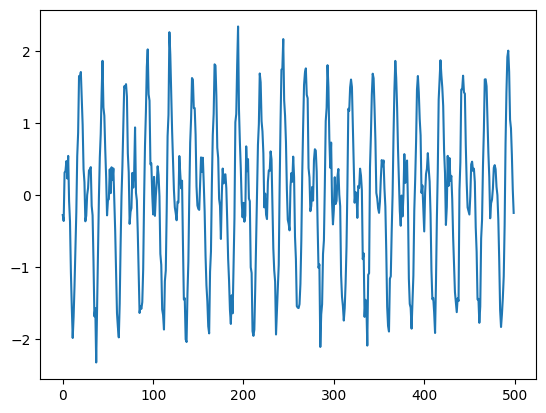

In [ ]:
# Parameters
fs = 250  # Sampling frequency (Hz)
duration = 2  # Duration of the signal (seconds)
time = np.linspace(0, duration, fs * duration)  # Time vector
num_channels = 5  # Number of EEG channels

noise = np.random.randn(len(time)) * 0.2

alpha_wave = np.sin(2 * np.pi * 10 * time + np.random.rand() * 2 * np.pi)
beta_wave = np.sin(2 * np.pi * 20 * time + np.random.rand() * 2 * np.pi)
signal = alpha_wave + beta_wave + noise


shifted_signals = []

plt.plot(signal)

## Fig. 1.2 Examples of Morlet wavelets from different sine waves

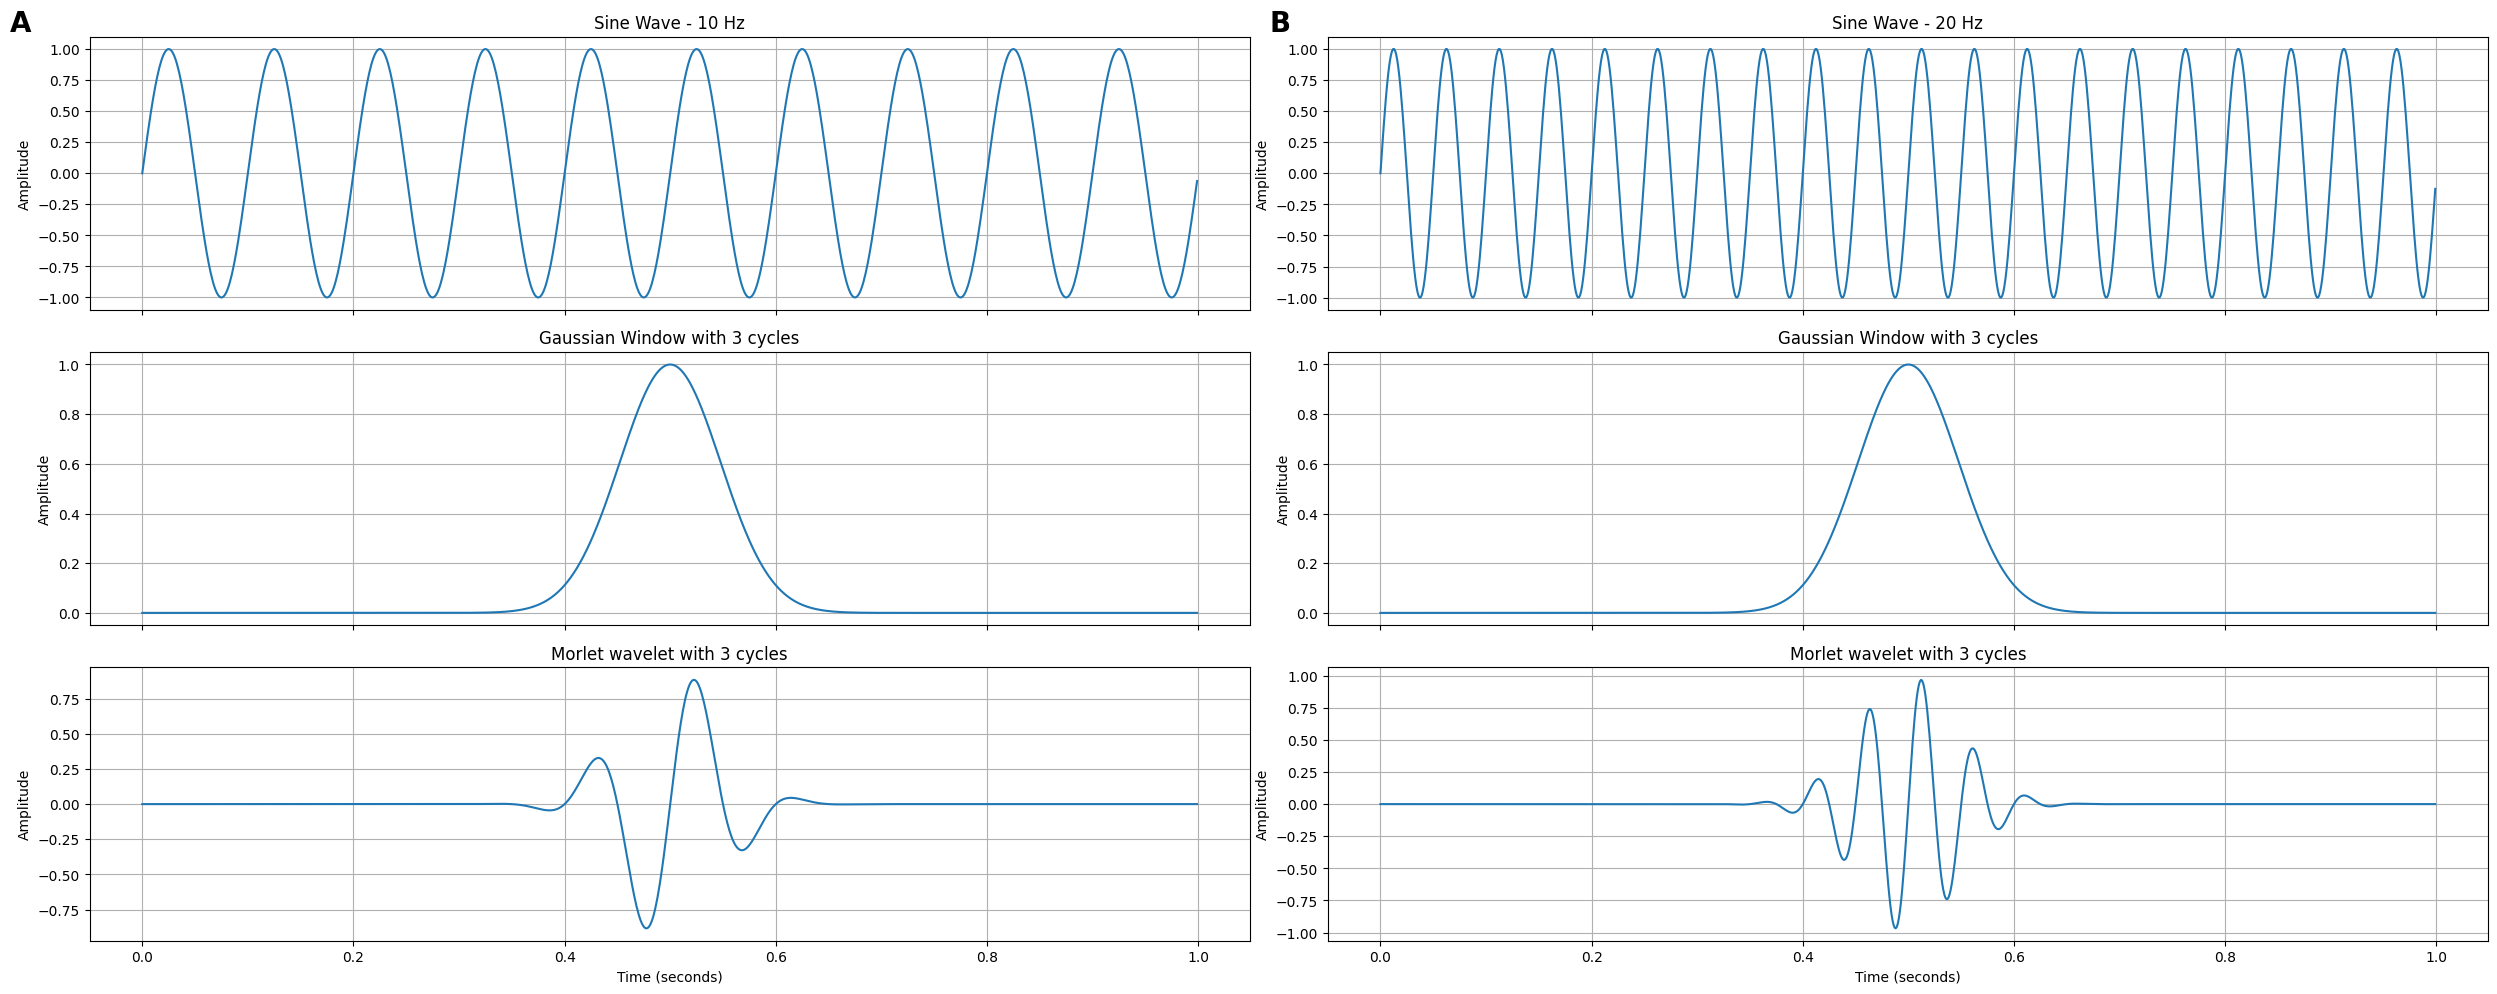

In [ ]:
# Parameters
frequency = 10  # Hz
frequency2 = 20
sampling_rate = 1000  # Samples per second
duration = 1  # Seconds
cycles = 3  # Number of cycles for Gaussian window

# Generate time values
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Generate sine wave
y = np.sin(2 * np.pi * frequency * t)
y2 = np.sin(2 * np.pi * frequency2 * t)

# Define Gaussian window using given formula
a = 1  # Amplitude scaling factor
m = duration / 2  # Center of the Gaussian
s = (cycles / (2 * np.pi * frequency))  # Standard deviation of Gaussian

gaussian_window = a * np.exp(-((t - m) ** 2) / (2 * s ** 2))


# Apply Gaussian window
y_windowed = y * gaussian_window
y_windowed2 = y2 * gaussian_window

# Plot all components
fig, axs = plt.subplots(3, 2, figsize=(25, 10), sharex=True)#, sharey=True)

# Plot sine wave
axs[0][0].plot(t, y)
axs[0][0].set_title(f'Sine Wave - {frequency} Hz')
#axs[0].set_xlabel('Time (seconds)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].grid()
axs[0][0].text(-0.05, 1.1, 'A', transform=axs[0][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot Gaussian window
axs[1][0].plot(t, gaussian_window)
axs[1][0].set_title(f'Gaussian Window with {cycles} cycles')
#axs[1][0].set_xlabel('Time (seconds)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].grid()

# Plot windowed sine wave
axs[2][0].plot(t, y_windowed)
axs[2][0].set_title(f'Morlet wavelet with {cycles} cycles')
axs[2][0].set_xlabel('Time (seconds)')
axs[2][0].set_ylabel('Amplitude')
axs[2][0].grid()


# Plot sine wave
axs[0][1].plot(t, y2)

#axs[0].set_xlabel('Time (seconds)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].grid()

axs[0][1].text(-0.05, 1.1, 'B', transform=axs[0][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
axs[0][1].set_title(f'Sine Wave - {frequency2} Hz')

# Plot Gaussian window
axs[1][1].plot(t, gaussian_window)
axs[1][1].set_title(f'Gaussian Window with {cycles} cycles')
#axs[1][0].set_xlabel('Time (seconds)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].grid()

# Plot windowed sine wave
axs[2][1].plot(t, y_windowed2)
axs[2][1].set_title(f'Morlet wavelet with {cycles} cycles')
axs[2][1].set_xlabel('Time (seconds)')
axs[2][1].set_ylabel('Amplitude')
axs[2][1].grid()
plt.tight_layout()
plt.show()



## Fig 1.3 Examples of Morlet wavelets with different cycles

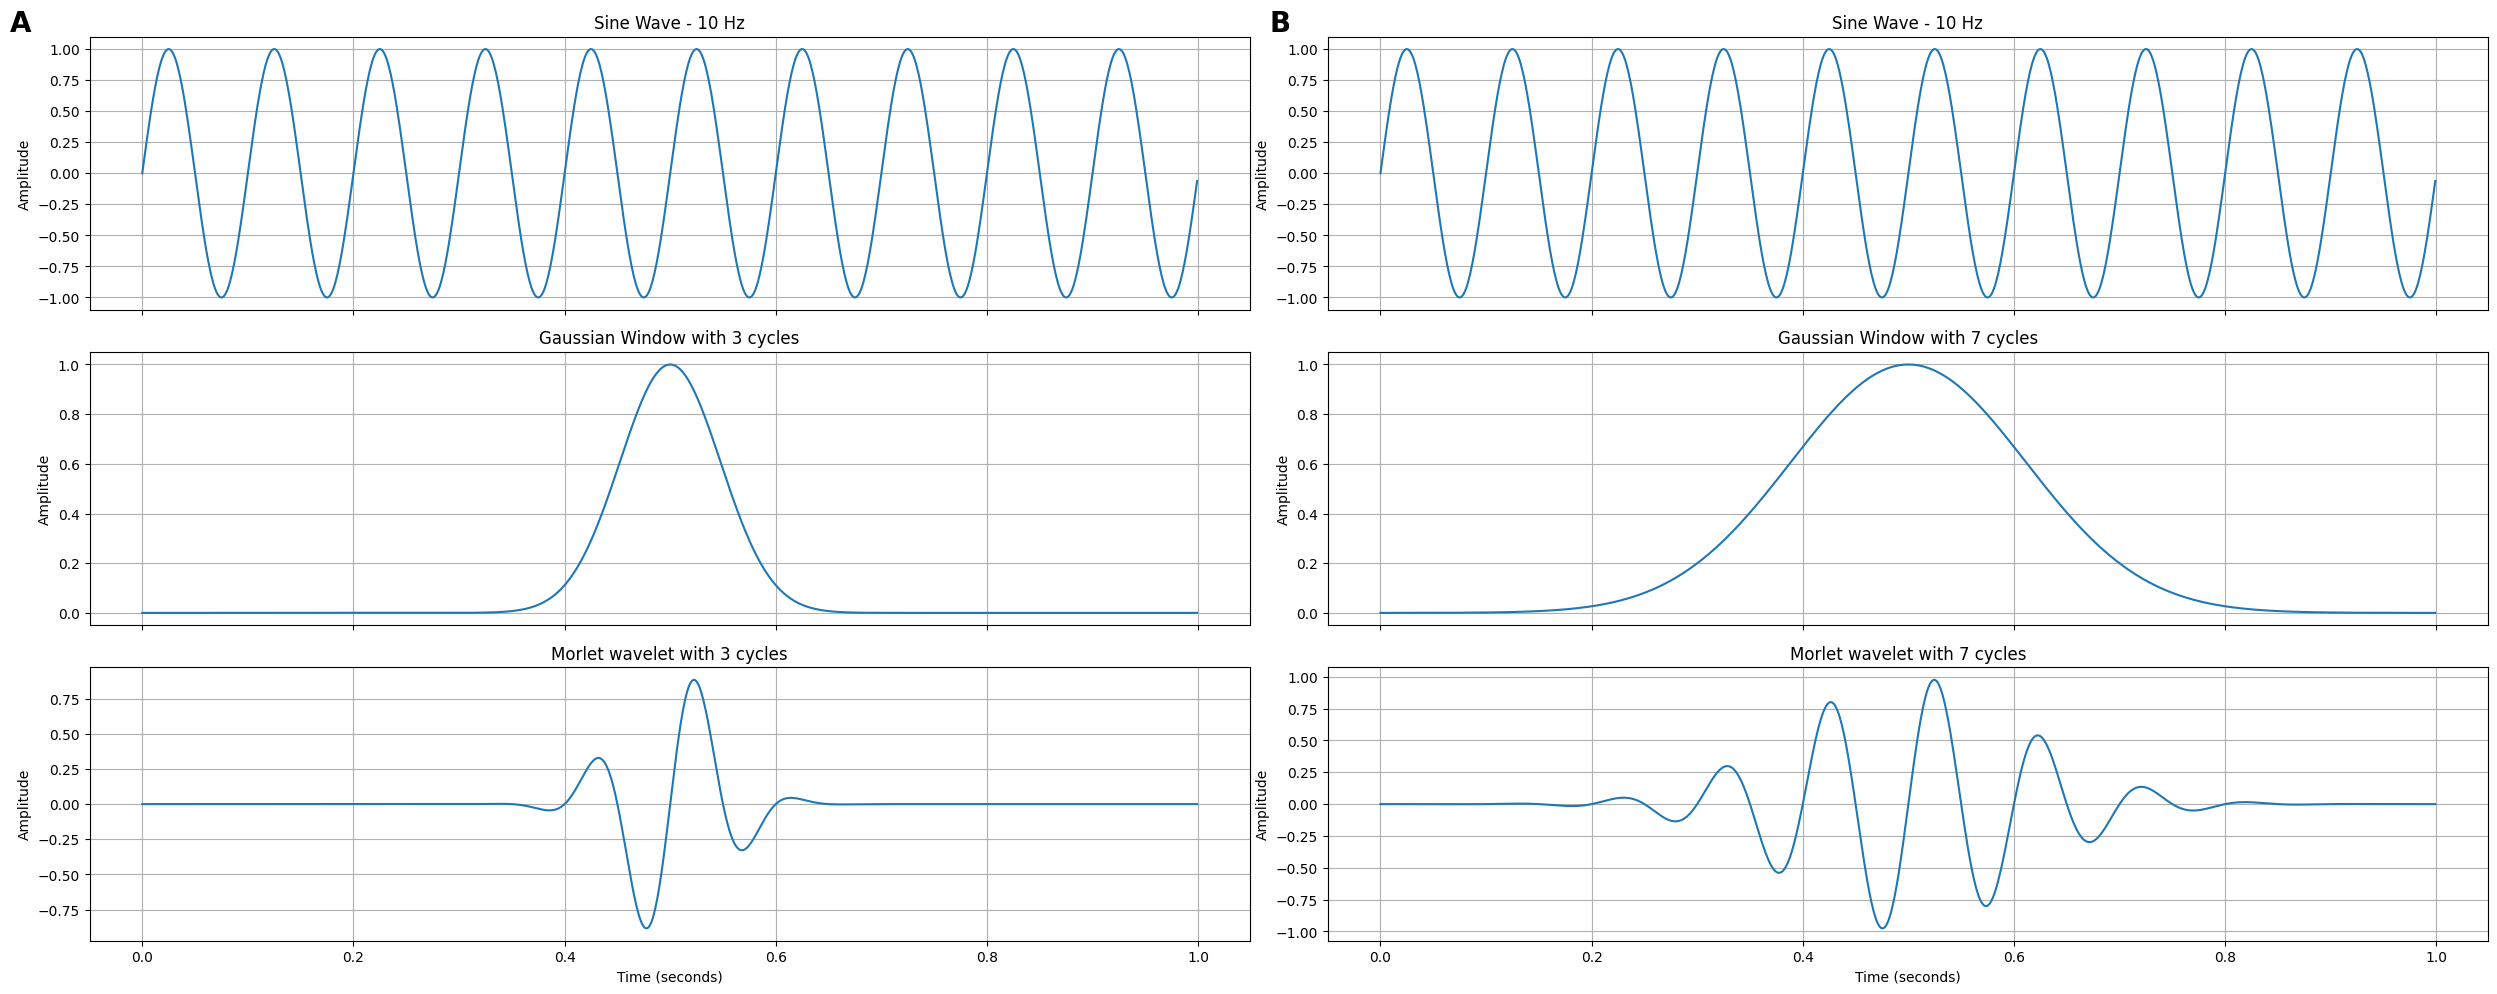

In [ ]:
# Parameters
frequency = 10  # Hz
sampling_rate = 1000  # Samples per second
duration = 1  # Seconds
cycles = 3  # Number of cycles for Gaussian window
cycles2 = 7

# Generate time values
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Generate sine wave
y = np.sin(2 * np.pi * frequency * t)


# Define Gaussian window using given formula
a = 1  # Amplitude scaling factor
m = duration / 2  # Center of the Gaussian
s = (cycles / (2 * np.pi * frequency))  # Standard deviation of Gaussian
s2 = (cycles2 / (2 * np.pi * frequency))

gaussian_window = a * np.exp(-((t - m) ** 2) / (2 * s ** 2))
gaussian_window2 = a * np.exp(-((t - m) ** 2) / (2 * s2 ** 2))


# Apply Gaussian window
y_windowed = y * gaussian_window
y_windowed2 = y * gaussian_window2

# Plot all components
fig, axs = plt.subplots(3, 2, figsize=(25, 10), sharex=True)#, sharey=True)

# Plot sine wave
axs[0][0].plot(t, y)
axs[0][0].set_title(f'Sine Wave - {frequency} Hz')
#axs[0].set_xlabel('Time (seconds)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].grid()
axs[0][0].text(-0.05, 1.1, 'A', transform=axs[0][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot Gaussian window
axs[1][0].plot(t, gaussian_window)
axs[1][0].set_title(f'Gaussian Window with {cycles} cycles')
#axs[1][0].set_xlabel('Time (seconds)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].grid()

# Plot windowed sine wave
axs[2][0].plot(t, y_windowed)
axs[2][0].set_title(f'Morlet wavelet with {cycles} cycles')
axs[2][0].set_xlabel('Time (seconds)')
axs[2][0].set_ylabel('Amplitude')
axs[2][0].grid()


# Plot sine wave
axs[0][1].plot(t, y)

#axs[0].set_xlabel('Time (seconds)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].grid()

axs[0][1].text(-0.05, 1.1, 'B', transform=axs[0][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
axs[0][1].set_title(f'Sine Wave - {frequency} Hz')

# Plot Gaussian window
axs[1][1].plot(t, gaussian_window2)
axs[1][1].set_title(f'Gaussian Window with {cycles2} cycles')
#axs[1][0].set_xlabel('Time (seconds)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].grid()

# Plot windowed sine wave
axs[2][1].plot(t, y_windowed2)
axs[2][1].set_title(f'Morlet wavelet with {cycles2} cycles')
axs[2][1].set_xlabel('Time (seconds)')
axs[2][1].set_ylabel('Amplitude')
axs[2][1].grid()
plt.tight_layout()
plt.show()

